# Numeryczne rozwiązywanie równań różniczkowych cząstkowych
## Równanie eliptyczne
### Metoda Galerkina 2D

In [1]:
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Użyjemy sympy, by nie musieć samodzielnie liczyć całek.

In [2]:
import sympy as sp
from sympy import symbols, sqrt, exp, diff, integrate, pprint  

x, y = sp.symbols('x y')
                                                                                                                                                              

# pprint(diff(4*x**3+exp(3*x**2*y)+y**2,x))                                                                                                                                          
# pprint(diff(4*x**3+exp(3*x**2*y)+y**2,y))                                                                                                                                          
# pprint(integrate(exp(x*y**2)+sqrt(x)*y**2,x))                                                                                                                                      
# pprint(integrate(exp(x*y**2)+sqrt(x)*y**2,y))

_I = integrate(exp(x*y**2)+sqrt(x)*y**2, (x,0,1), (y,-1,1))
pprint(_I)
print(_I)
print(np.array(_I).astype(np.float64))

-2⋅ℯ + 22/9 + 2⋅√π⋅erfi(1)
-2*E + 22/9 + 2*sqrt(pi)*erfi(1)
2.8584877711550805


Zacznijmy od fukcji bazowych dla metody Galerkina

Proszę zaimplementować funkcja zwracająca funkcje bazowe postaci

$$ sin(i \pi x) sin (j \pi y)$$

In [3]:
def sines(x, y, Nx, Ny):
    pass  # TODO

Równanie Poissona:

$$\begin{align*}
    -\Delta u = f & \quad \text{w } \Omega\\
    u = 0 & \quad \text{na } \partial \Omega
\end{align*}$$

Zbudujmy odpowiedni układ równań

$$\sum\limits_{j=1}^{n} c_j \iint_\Omega \nabla \psi_j \nabla \psi_i dxdy = \iint_\Omega f \psi_i dxdy \quad i=1,\dots,n$$

$$ Ac = b $$

Zaimplementujmy tworzenie takiego układu równań: 

In [4]:
def construct_A_and_b(f, psi, Omega):
    N = len(psi)
    A = sp.zeros(N, N)
    b = sp.zeros(N, 1)
    for i in range(N):
        for j in range(i, N):
            # TODO
            A[i, j] = A[j, i] = I

        # TODO
        b[i, 0] = I
    return A, b

### Zadanie 1

In [5]:
f = 0
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
A, b = construct_A_and_b(f, psi, Omega)
# print(A, b)
pprint(A)
pprint(b)

⎡ 2                  ⎤
⎢π                   ⎥
⎢──   0     0     0  ⎥
⎢2                   ⎥
⎢                    ⎥
⎢       2            ⎥
⎢    5⋅π             ⎥
⎢0   ────   0     0  ⎥
⎢     4              ⎥
⎢                    ⎥
⎢             2      ⎥
⎢          5⋅π       ⎥
⎢0    0    ────   0  ⎥
⎢           4        ⎥
⎢                    ⎥
⎢                   2⎥
⎣0    0     0    2⋅π ⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


Rozwiązanie symobliczne

In [6]:
c = A.LUsolve(b)
u = 0
for i in range(len(psi)):
    u += c[i, 0] * psi[i]
print(u)

0


Rozwiązanie numeryczne

In [7]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

Pomocnicze funkcje do wyrysowania wyników

In [8]:
def scatter_solution(c, psi, Omega, psi_0=0*x*y, d=32):
    X, Y, u = np.linspace(Omega[0][0], Omega[0][1], d), np.linspace(Omega[1][0], Omega[1][1], d), np.zeros((d, d))
    for i, x_value in enumerate(X):
        for j, y_value in enumerate(Y):
            u[i, j] = psi_0.subs([(x, x_value), (y, y_value)])
            for k in range(len(psi)):
                u[i, j] += float(c[k] * psi[k].subs([(x, x_value), (y, y_value)]))
    return X, Y, u

def scatter_exac(func, Omega, d=32):
    X, Y, u = np.linspace(Omega[0][0], Omega[0][1], d), np.linspace(Omega[1][0], Omega[1][1], d), np.zeros((d, d))
    for i, x_value in enumerate(X):
        for j, y_value in enumerate(Y):
            u[i, j] = func.subs([(x, x_value), (y, y_value)])
    return X, Y, u

In [9]:
def plot_surface(X, Y, u):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Prepare grid.
    X, Y = np.meshgrid(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    # ax.set_zlim(-.2, 1.2)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

C:\Users\prb\AppData\Local\Temp/ipykernel_18516/2266408165.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


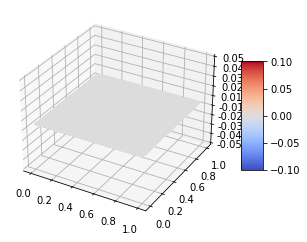

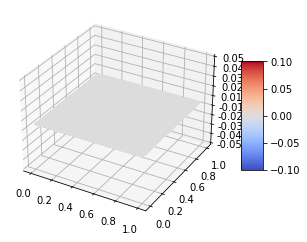

In [10]:
plot_surface(*scatter_solution(c, psi, Omega))
plot_surface(*scatter_exac(0*x*y, Omega))

### Zadanie 2
$$ -\Delta u = - 2  \pi^2  \sin(\pi  x) \sin(\pi y) \quad \text{w } \Omega $$
$$ u = 0 \quad \text{na } \partial \Omega $$

In [ ]:
f = # TODO
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
A, b = construct_A_and_b(f, psi, Omega)
# print(A, b)

In [12]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

C:\Users\prb\AppData\Local\Temp/ipykernel_18516/2266408165.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


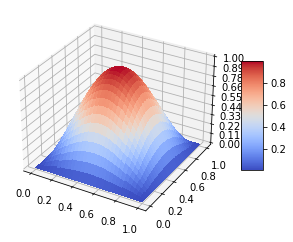

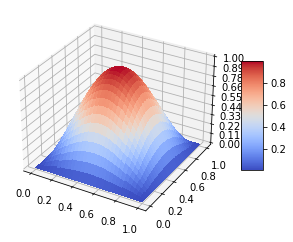

In [13]:
plot_surface(*scatter_solution(c, psi, Omega))
plot_surface(*scatter_exac(sp.sin(sp.pi * x) * sp.sin(sp.pi * y), Omega))

### Zadanie 3
Rozważmy zagadnienie z niezerowym brzegiem:
$$ -\Delta u = 0 $$
$$ \Omega = (0, a) \times (0, a) $$

$$ \begin{align*}
    u(x, 0) = 0 & \qquad u(x, a) = u_0(e^x - 1)\\
    u(0, y) = 0 & \qquad u(a, y) = u_0(e^y - 1)
\end{align*} $$


Będziemy szukać funkcji postaci:

$$ u_{i}(x, y) = \psi_0 (x, y) + \sum\limits_{j=1}^{n} c_j \psi_j (x, y) $$

Proponuję:

$$ \psi_0 (x, y) = u_0 \frac{(e^x - 1)(e^y - 1)}{e^a - 1} $$


Rozwiązać dla $a = 3$.

In [14]:
def construct_A_and_b_with_psi_0(f, psi, psi_0, Omega):
    pass  # TODO

In [15]:
f = 0
psi = sines(x, y, 1, 1)
a = 3
Omega = [[0, a], [0, a]]
psi_0 = # TODO

A, b = construct_A_and_b_with_psi_0(f, psi, psi_0, Omega)

Rozwiązanie symboliczne jest dość skomplikowane

In [16]:
c = A.LUsolve(b)
u = psi_0
for i in range(len(psi)):
    u += c[i, 0] * psi[i]
print(u)
# pprint(u)

(exp(x) - 1)*(exp(y) - 1)/(-1 + exp(3)) + 2*(-4*pi*exp(3)/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)) - 2*pi**3/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)) - 4*pi/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)) + 2*pi**3*exp(6)/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)))*sin(pi*x)*sin(pi*y)/(9*pi**2) + 4*(-8*pi**3*exp(6)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) - 8*pi/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) + 8*pi*exp(3)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) + 8*pi**3*exp(3)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)))*sin(pi*x)*sin(2*pi*y)/(45*pi**2) + 4*(-8*pi**3*exp(6)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) - 8*pi/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) + 8*pi*exp(3)/(-

In [17]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

C:\Users\prb\AppData\Local\Temp/ipykernel_18516/2266408165.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


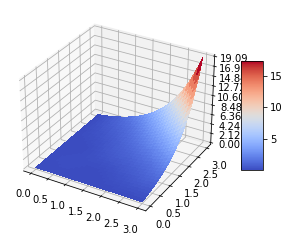

In [18]:
plot_surface(*scatter_solution(c, psi, Omega, psi_0))

### Zadanie 4

$$ -\Delta u = \sin(\pi y) (4 \pi x \cos(\pi  x) -
    (\pi^2 (x^2 + y^2)-2) \sin(\pi x)) + 
    \sin(\pi  x) (4 \pi y \cos(\pi y) -
    (\pi^2  (x^2 + y^2) - 2)  \sin(\pi y)) \;\;\; \text{w} \;\;\; \Omega $$
$$ u = 0 \;\;\; \text{na} \;\;\; \partial \Omega $$

Sprawdź błąd względny metody. Co należy zmienić, aby się zmiejszył?

In [19]:
f = sp.sin(sp.pi * y) * (4 * sp.pi * x *sp.cos(sp.pi * x) -\
    (sp.pi**2 * (x**2 + y**2) - 2) * sp.sin(sp.pi * x)) + \
    sp.sin(sp.pi * x) * (4 * sp.pi * y *sp.cos(sp.pi * y) -\
    (sp.pi**2 * (x**2 + y**2) - 2) * sp.sin(sp.pi * y))
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
A, b = construct_A_and_b(f, psi, Omega)

In [20]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

C:\Users\prb\AppData\Local\Temp/ipykernel_18516/2266408165.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


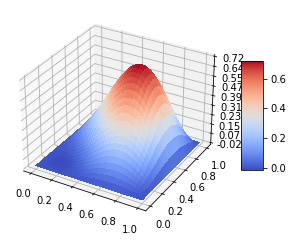

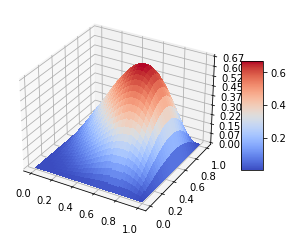

In [21]:
plot_surface(*scatter_solution(c, psi, Omega))
plot_surface(*scatter_exac(sp.sin(sp.pi * x) * sp.sin(sp.pi * y) * (x**2 + y**2), Omega))

In [ ]:
# ???

### Zadanie 5

$$ -\Delta u = 2 (x^2 + y^2) - 2 \pi ^ 2 \sin(\pi x) \sin(\pi y) \quad \text{w } \Omega $$
$$ \Omega = (0, a) \times (0, a) $$

$$ \begin{align*}
    u(0, y) = 0 & \qquad u(a, y) = y^2\\
    u(x, 0) = 0 & \qquad u(x, a) = x^2
\end{align*} $$

In [23]:
f =  # TODO
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
psi_0 =  # TODO

A, b = construct_A_and_b_with_psi_0(f, psi, psi_0, Omega)

In [24]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

C:\Users\prb\AppData\Local\Temp/ipykernel_18516/2266408165.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


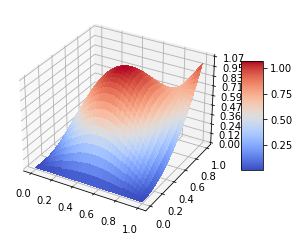

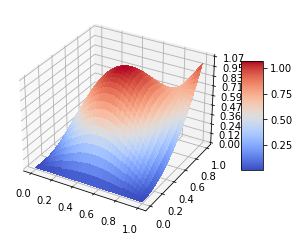

In [25]:
plot_surface(*scatter_solution(c, psi, Omega, psi_0))
plot_surface(*scatter_exac(x**2 * y**2 + sp.sin(sp.pi * x) * sp.sin(sp.pi * y), Omega))

### Metoda różnic skończonych
Zaimplementuj metodę różnic skończonych, rozwiąż powyższe zadania i porównaj wyniki

### Zadanie 6*: 
$ -\Delta u = -3 \pi^2 \sin(\pi x) \sin(\pi y) \sin(\pi z)$


$ u = 0 \quad \text{na } \partial \Omega $


$ \Omega = (0, 1) \times (0, 1) \times (0, 1)$

Rozwiązanie dokładne: 
$\: \sin(\pi x) \sin(\pi y) \sin(\pi z)$